In [2]:
!git clone https://github.com/Manjitpatil/img-classification.git

Cloning into 'img-classification'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 82.99 KiB | 2.77 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import streamlit as st

In [ ]:
Categories=['Cars','Ice cream cone','Cricket ball']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball,cat");


Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball,cat


In [ ]:
Categories = ['Cars', 'Ice cream cone', 'Cricket ball']
print("Type y to give categories or type n to go with classification of Cars, Ice cream cone, and Cricket ball, cat")
while True:
    check = input()
    if check == 'n' or check == 'y':
        break
    print("Please give a valid input (y/n)")

if check == 'y':
    print("Enter How Many types of Images do you want to classify")
    n = int(input())
    Categories = []
    print(f'please enter {n} names')
    for i in range(n):
        name = input()
        Categories.append(name)

print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")


Type y to give categories or type n to go with classification of Cars, Ice cream cone, and Cricket ball, cat
y
Enter How Many types of Images do you want to classify
2
please enter 2 names
Cars
Ice cream cone
If not drive Please upload all the 2 category images in google collab with the same names as given in categories


In [ ]:
cd/content/Image-Classification/Cars

/content/Image-Classification/Cars


In [ ]:

flat_data_arr = []
target_arr = []
# please use datadir='/content' if the files are uploaded on to Google Colab
# else mount the drive and give the path of the parent-folder containing all category images folders.
datadir = '/content/Image-Classification'

for i in Categories:
    print(f'loading... category : {i.strip()}')  # Stripping extra whitespace
    path = os.path.join(datadir, i.strip())  # Stripping extra whitespace
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i.strip()))  # Stripping extra whitespace
    print(f'loaded category: {i.strip()} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df['Target'] = target
df

loading... category : Cars
loaded category: Cars successfully
loading... category : Ice cream cone
loaded category: Ice cream cone successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.106323,0.162013,0.018492,0.111447,0.169872,0.014202,0.125845,0.184664,0.017824,0.115548,...,0.592949,0.457482,0.444474,0.606716,0.471733,0.458356,0.615087,0.480212,0.466819,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.125471,0.181245,0.050994,0.228965,0.296064,0.080535,0.216547,0.284783,0.084131,0.121300,...,0.292954,0.304718,0.230208,0.237886,0.242990,0.171810,0.154850,0.158772,0.088184,0
4,0.776480,0.780401,0.788244,0.777846,0.781768,0.789611,0.780461,0.784382,0.792226,0.783874,...,0.549451,0.549451,0.541608,0.555135,0.555135,0.547292,0.557294,0.557294,0.549451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1
66,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
67,0.570179,0.585865,0.624004,0.588772,0.600717,0.639852,0.602560,0.612902,0.652464,0.618944,...,0.705176,0.731604,0.744794,0.699843,0.723718,0.737976,0.694097,0.717972,0.732230,1
68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 78.57142857142857% accurate


In [ ]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Image/content/Image-Classification/Cars/2018_Toyota_Corolla_(ZRE172R)_Ascent_sedan_(2018-11-02)_01.jpg


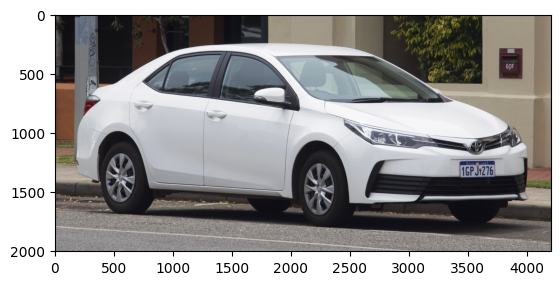

Cars = 91.9684305535885%
Ice cream cone = 8.031569446411494%
The predicted image is : Cars
Is the image a Cars ?(y/n)
y
Thank you for your feedback


In [ ]:

#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
